# Exploring Correlations with Python (Movie Industry Dataset)

## Preliminaries

The goal is to import the Movie Industry dataset (from Kaggle.com), clean it and explore the correlations among the features.

Link to dataset: https://www.kaggle.com/datasets/danielgrijalvas/movies


In [2]:
#Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('ggplot') #Set style
from matplotlib.pyplot import figure

#Allow plots to appear below notebook cell
%matplotlib inline 
plt.rcParams['figure.figsize'] = (12,8) #Adjust the configuration of the plots


df = pd.read_csv(r'C:\Users\vince\Downloads\movies.csv')

## Data Cleaning


In [3]:
#Inspect the table
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [4]:
#Data types of columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
#Inspect missing data

old_rows = df.shape[0]

for col in df.columns:
    perc_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, np.round(perc_missing*100,3)))
    
#Drop entries with null values in columns of interest
df = df.dropna(how = 'any', subset = ['budget', 'gross'])


new_rows = df.shape[0]

print('Working with {}% of rows.'.format(np.round(new_rows/old_rows*100,2)))




name - 0.0%
rating - 1.004%
genre - 0.0%
year - 0.0%
released - 0.026%
score - 0.039%
votes - 0.039%
director - 0.0%
writer - 0.039%
star - 0.013%
country - 0.039%
budget - 28.312%
gross - 2.465%
company - 0.222%
runtime - 0.052%
Working with 70.89% of rows.


In [6]:
#Cast some values as integers (no errors returned since no nulls)

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [7]:
#"year" column and year in "released" column often do not match.
#"released" column stores strings like "February 26, 1997 (United States)"

df['year_correct'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

 


In [8]:
#Sort data

df.sort_values(by = ['gross'], ascending = False, inplace= True)

In [9]:
#Remove duplicates

df.drop_duplicates(inplace = True)


## Exploring correlation in the data

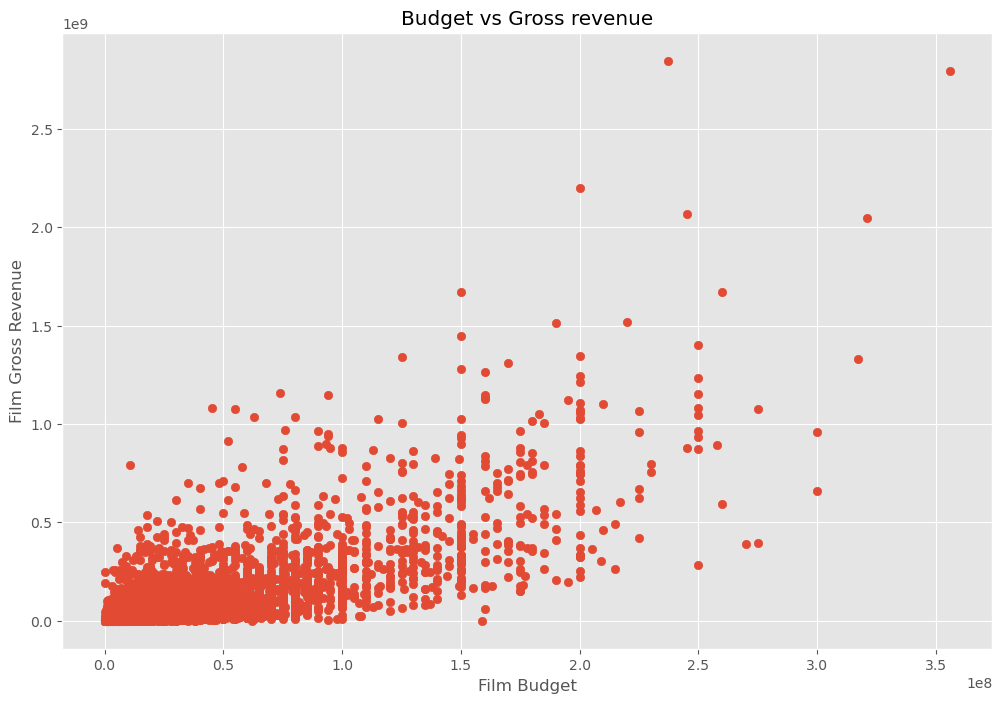

In [10]:
#Scatter plot: budget vs plot

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross revenue')
plt.xlabel('Film Budget')
plt.ylabel('Film Gross Revenue')

plt.show()

Regression plot (sing seaborn) to highlight trend

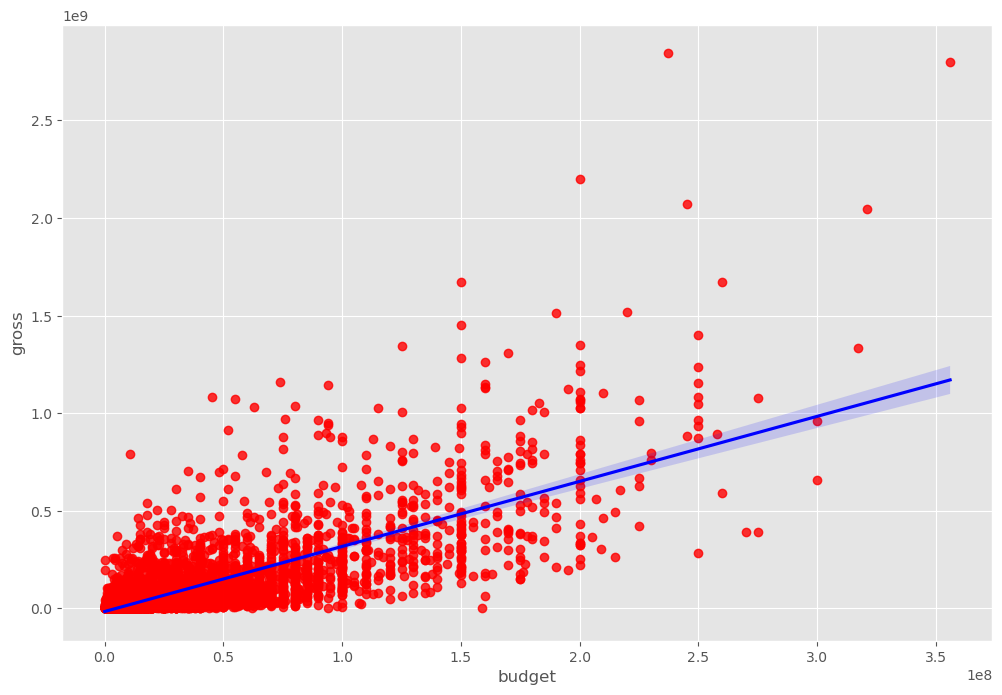

In [11]:
#Plot budget vs gross using seaborn

sns.regplot(x = 'budget', y = 'gross', data=df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})

plt.show()

<AxesSubplot:xlabel='score', ylabel='gross'>

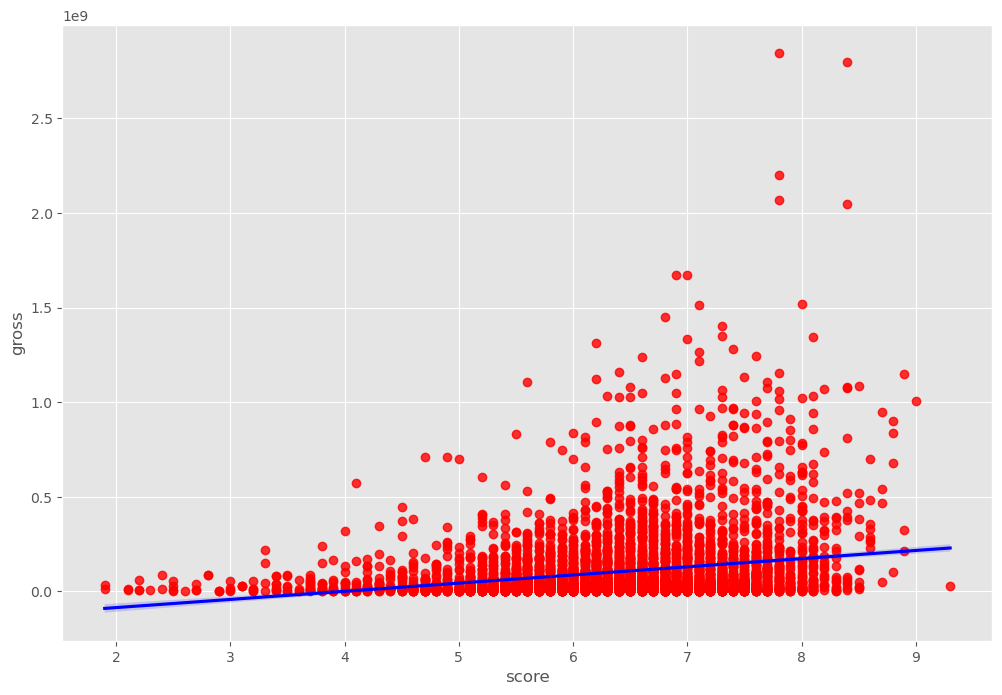

In [12]:
#Explore the trend in IMDb score vs gross revenue.
sns.regplot(x="score", y="gross", data=df, scatter_kws = {"color": "red"}, line_kws = {"color": "blue"})


In [13]:
#Explore the top 15 companies by gross revenue
CompanyGrossSum = df.groupby('company')['gross'].sum()


CompanyGrossSum.sort_values(ascending = False, inplace = True)

CompanyGrossSum.head(15)


company
Warner Bros.                 54773202654
Universal Pictures           51241105418
Columbia Pictures            42356430218
Paramount Pictures           40021704691
Twentieth Century Fox        39542573303
Walt Disney Pictures         35833650748
New Line Cinema              19628786232
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Dreamworks Pictures          11593807697
Touchstone Pictures          10664679494
Metro-Goldwyn-Mayer (MGM)     8937010092
Summit Entertainment          8318570396
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7243673721
Name: gross, dtype: int64

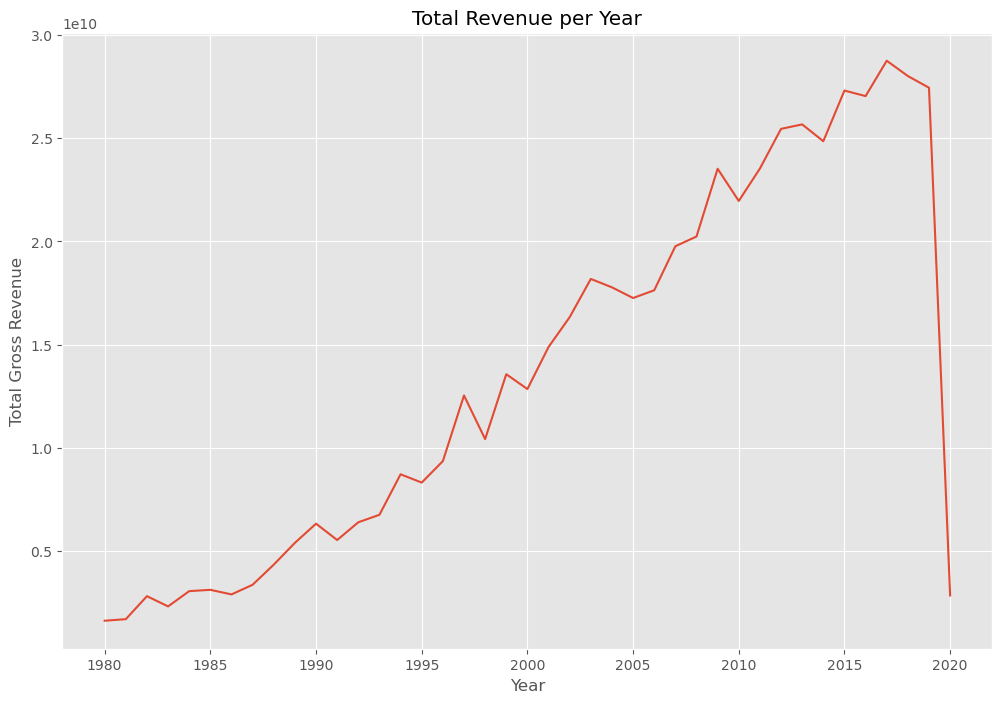

In [38]:
#Inspect total gross revenue per year

df_year_group = df.groupby(['year_correct'])


plt.plot( df_year_group['gross'].sum())
plt.title('Total Revenue per Year')
plt.xlabel('Year')
plt.ylabel('Total Gross Revenue')

plt.show()

In [185]:
#Let us look at correlations.
df.corr(method = "pearson")

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.055174,0.205758,0.327781,0.274264,0.074203,0.998641
score,0.055174,1.000000,0.473809,0.071792,0.222143,0.414580,0.061029
votes,0.205758,0.473809,1.000000,0.440021,0.614904,0.352437,0.202883
budget,0.327781,0.071792,0.440021,1.000000,0.740395,0.318595,0.320245
gross,0.274264,0.222143,0.614904,0.740395,1.000000,0.275596,0.268626
runtime,0.074203,0.414580,0.352437,0.318595,0.275596,1.000000,0.074432
year_correct,0.998641,0.061029,0.202883,0.320245,0.268626,0.074432,1.000000


In [173]:
df.corr(method ='kendall')

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.038391,0.295884,0.220991,0.239313,0.064106,0.991087
score,0.038391,1.000000,0.350111,-0.006518,0.124715,0.292872,0.042612
votes,0.295884,0.350111,1.000000,0.346228,0.553640,0.205616,0.292588
budget,0.220991,-0.006518,0.346228,1.000000,0.512637,0.230879,0.213658
gross,0.239313,0.124715,0.553640,0.512637,1.000000,0.176825,0.232192
runtime,0.064106,0.292872,0.205616,0.230879,0.176825,1.000000,0.064120
year_correct,0.991087,0.042612,0.292588,0.213658,0.232192,0.064120,1.000000


In [174]:
df.corr(method ='spearman')

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.056269,0.426571,0.313199,0.350679,0.094396,0.998618
score,0.056269,1.000000,0.495379,-0.010133,0.182857,0.413040,0.062508
votes,0.426571,0.495379,1.000000,0.493404,0.745815,0.300959,0.422187
budget,0.313199,-0.010133,0.493404,1.000000,0.693670,0.330276,0.302558
gross,0.350679,0.182857,0.745815,0.693670,1.000000,0.257121,0.340211
runtime,0.094396,0.413040,0.300959,0.330276,0.257121,1.000000,0.094520
year_correct,0.998618,0.062508,0.422187,0.302558,0.340211,0.094520,1.000000


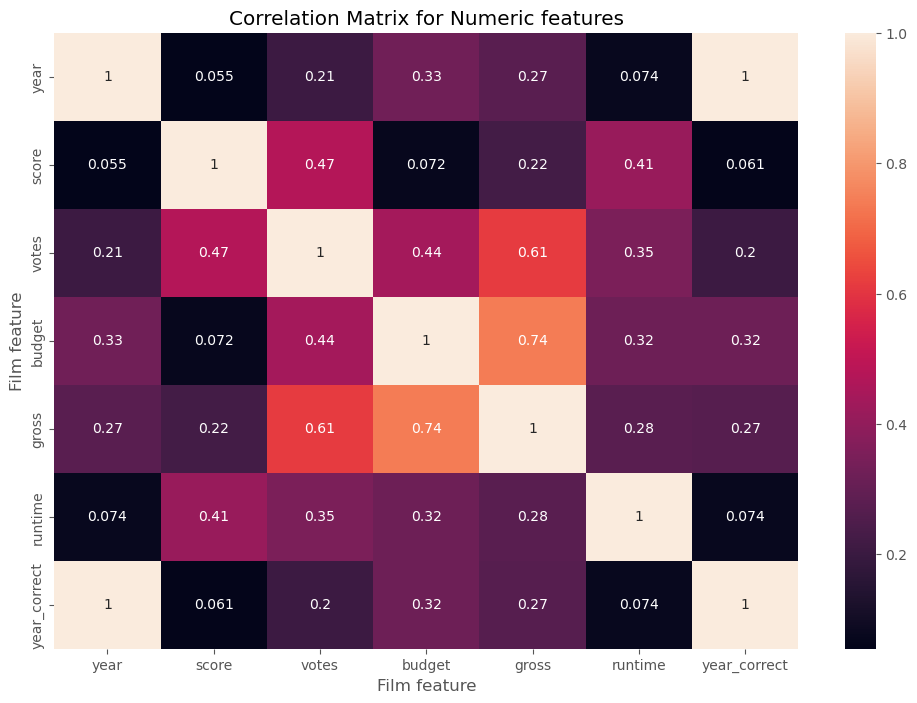

In [150]:
#Visualise Correlation matrix.

correlation_matrix = df.corr(method = "pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Film feature')
plt.ylabel('Film feature')

plt.show()


Notice highest correlation between gross and budget, followed by gross and votes.

Create numeric representation of non-numeric features (company, director etc) to investigate their correlation with, e.g. gross revenue.

In [152]:
df_numerised = df.copy()

for col_name in df_numerised.columns:
    if df_numerised[col_name].dtype == 'object':
        df_numerised[col_name] = df_numerised[col_name].astype('category')
        #Method assigns a random numerical identifier to distinct elements in column.        
        df_numerised[col_name] = df_numerised[col_name].cat.codes 

        
df_numerised.head()

#Columns affected: name, rating, genre, released, director, writer, star, country, companu

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
5445,387,5,0,2009,528,7.8,1100000.0,787,1265,1538,47,237000000,2847246203,1388,162.0,2009
7445,389,5,0,2019,138,8.4,903000.0,106,515,1474,47,356000000,2797501328,987,181.0,2019
3045,4923,5,6,1997,535,7.8,1100000.0,787,1265,1076,47,200000000,2201647264,1388,194.0,1997
6663,3656,5,0,2015,530,7.8,876000.0,770,1810,357,47,245000000,2069521700,949,138.0,2015
7244,390,5,0,2018,146,8.4,897000.0,106,515,1474,47,321000000,2048359754,987,149.0,2018


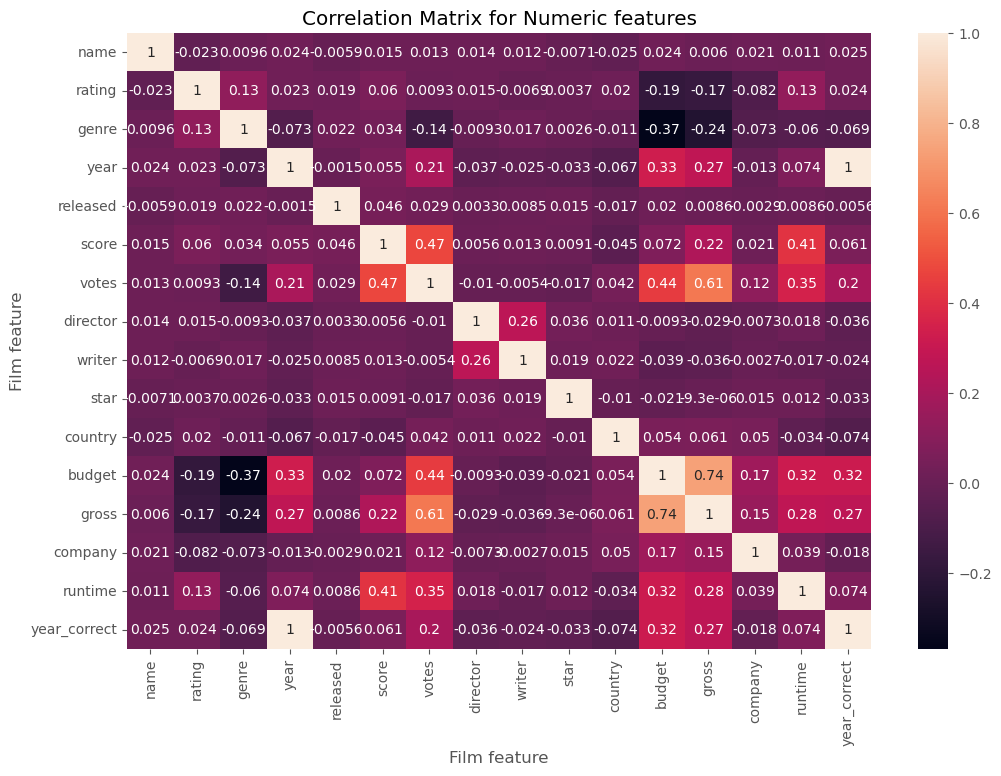

In [154]:
#Visualise the total correlation matrix

correlation_matrix = df_numerised.corr(method = "pearson")

sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix for Numeric features')
plt.xlabel('Film feature')
plt.ylabel('Film feature')

plt.show()

Notice the (unexpected?) low correlation between Company and Gross revenue and between Company and Budget.

In [169]:
#Display the list of matrix elements in descending order

correlation_mat = df_numerised.corr()

corr_pairs = correlation_mat.unstack()

pd.set_option('display.max_rows',1000)

sorted_pairs = corr_pairs.sort_values()


sorted_pairs.head()

budget  genre    -0.368900
genre   budget   -0.368900
        gross    -0.244380
gross   genre    -0.244380
rating  budget   -0.186892
dtype: float64

In [170]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5] 

high_corr.head(7)

gross         votes           0.614904
votes         gross           0.614904
gross         budget          0.740395
budget        gross           0.740395
year          year_correct    0.998641
year_correct  year            0.998641
name          name            1.000000
dtype: float64